In [16]:
%matplotlib inline
import numpy as np
import tensorflow as tf
with np.load("notMNIST.npz") as data:
    images, labels = data["images"], data["labels"]
from matplotlib import pyplot as plt

(18720, 1)
(2720, 1)
[5]


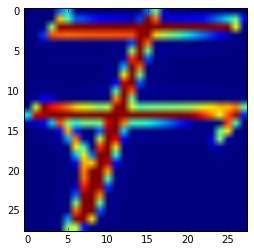

In [27]:
training_set = images[:,:,0:15000]
training_labels = labels[0:15000]
validation_set = images[:,:,15000:16000]
validation_labels = labels[15000:16000]
testing_set = images[:,:,16000:]
testing_labels = labels[16000:]

plt.imshow(images[:,:,2])
print labels[2]